X shape: (450, 90000)
y shape: (450,)
Classes: ['Amitabh', 'Alia', 'Ileana', 'Aamir', 'Akshay', 'Deepika', 'Farhan', 'Disha', 'Ajay']
Total samples: 450
n_classes: 9

Extracting 150 eigenfaces


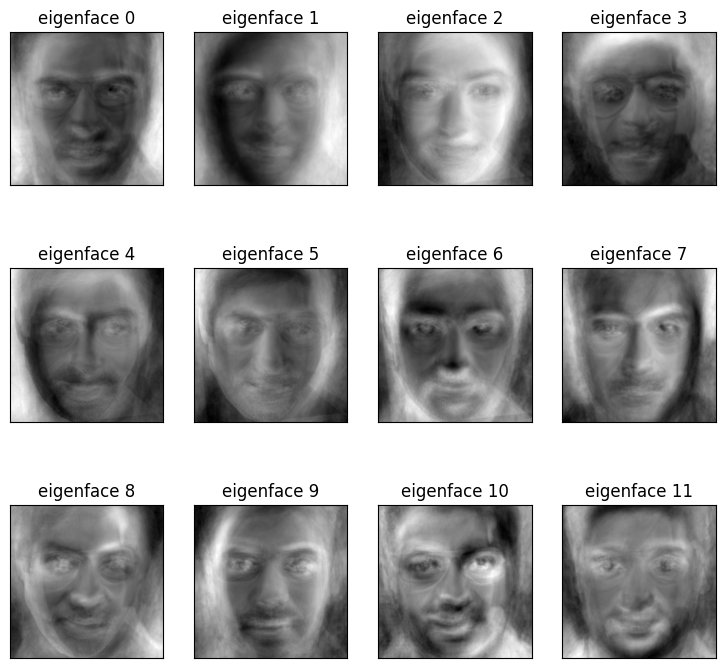

PCA transformed shapes: (337, 150) (113, 150)
LDA shapes: (337, 8) (113, 8)

Training SVM...

FINAL ACCURACY: 0.7433628318584071


In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
import numpy as np
import cv2
import os


def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


dir_name = "/Users/yashrajthomas/Desktop/dataset 4/faces/"

X = []
y = []
target_names = []
class_names = []
person_id = 0

h = w = 300
n_samples = 0

for person_name in os.listdir(dir_name):
    dir_path = dir_name + person_name + "/"
    if not os.path.isdir(dir_path):
        continue
    
    class_names.append(person_name)

    for image_name in os.listdir(dir_path):
        image_path = dir_path + image_name
        
        img = cv2.imread(image_path)
        if img is None:
            continue

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (h, w))

        X.append(resized.flatten())
        y.append(person_id)
        target_names.append(person_name)
        n_samples += 1

    person_id += 1

X = np.array(X)
y = np.array(y)
target_names = np.array(target_names)

n_features = X.shape[1]
n_classes = len(class_names)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Classes:", class_names)
print("Total samples:", n_samples)
print("n_classes:", n_classes)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42)


n_components = min(150, X_train.shape[0])

print("\nExtracting", n_components, "eigenfaces")

pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

titles = [f"eigenface {i}" for i in range(n_components)]
plot_gallery(eigenfaces, titles, h, w)
plt.show()

# Project data into PCA space
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("PCA transformed shapes:", X_train_pca.shape, X_test_pca.shape)


lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train_pca, y_train)
X_test_lda = lda.transform(X_test_pca)

print("LDA shapes:", X_train_lda.shape, X_test_lda.shape)


print("\nTraining SVM...")
clf = SVC(kernel='linear')
clf.fit(X_train_lda, y_train)


accuracy = clf.score(X_test_lda, y_test)
print("\nFINAL ACCURACY:", accuracy)

In [6]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(
    random_state=1,
    hidden_layer_sizes=(10, 10),
    max_iter=1000,
    verbose=True
).fit(X_train_lda, y_train)

print("Model Weights:")
model_info = [coef.shape for coef in clf.coefs_]
print(model_info)


Iteration 1, loss = 2.60459856
Iteration 2, loss = 2.56773625
Iteration 3, loss = 2.53307810
Iteration 4, loss = 2.49876007
Iteration 5, loss = 2.46600794
Iteration 6, loss = 2.43421684
Iteration 7, loss = 2.40294486
Iteration 8, loss = 2.37360433
Iteration 9, loss = 2.34455686
Iteration 10, loss = 2.31730216
Iteration 11, loss = 2.29080512
Iteration 12, loss = 2.26521914
Iteration 13, loss = 2.23999537
Iteration 14, loss = 2.21594125
Iteration 15, loss = 2.19220538
Iteration 16, loss = 2.16916978
Iteration 17, loss = 2.14611050
Iteration 18, loss = 2.12390996
Iteration 19, loss = 2.10252727
Iteration 20, loss = 2.08057311
Iteration 21, loss = 2.05951067
Iteration 22, loss = 2.03873655
Iteration 23, loss = 2.01795032
Iteration 24, loss = 1.99778202
Iteration 25, loss = 1.97784618
Iteration 26, loss = 1.95791573
Iteration 27, loss = 1.93789362
Iteration 28, loss = 1.91848976
Iteration 29, loss = 1.89950454
Iteration 30, loss = 1.88035763
Iteration 31, loss = 1.86119710
Iteration 32, los

Accuracy: 70.79646017699115


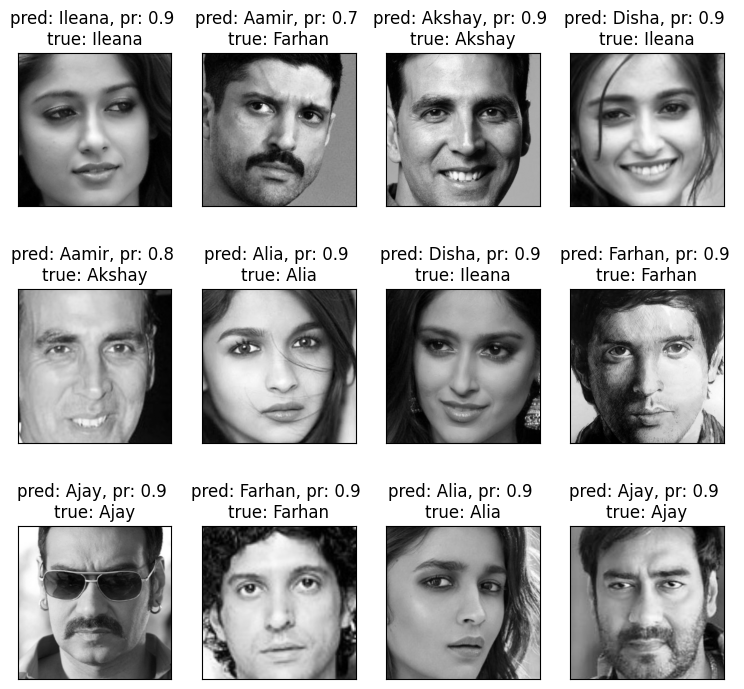

In [7]:
y_pred=[];y_prob=[]
for test_face in X_test_lda:
    prob = clf.predict_proba([test_face])[0]
    class_id = np.where(prob == np.max(prob))[0][0]
    y_pred.append(class_id)
    y_prob.append(np.max(prob))


y_pred = np.array(y_pred)
        

prediction_titles=[]
true_positive = 0
for i in range(y_pred.shape[0]):

    true_name = class_names[y_test[i]]
    pred_name = class_names[y_pred[i]]
    result = 'pred: %s, pr: %s \ntrue: %s' % (pred_name, str(y_prob[i])[0:3], true_name)

    prediction_titles.append(result)
    if true_name==pred_name:
        true_positive =true_positive+1
        
print("Accuracy:",true_positive*100/y_pred.shape[0])


plot_gallery(X_test, prediction_titles, h, w)
plt.show()